**BOYER Julie**

**COTTE Agathe**

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams["figure.figsize"] = (3,3)
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp

Bifurcations de populations de neurones
======================

Le but de ce projet est de simuler l'évolution de l'activité moyenne de groupes de neurones en intéraction, à l'aide d'un modèle simplifié de *Wilson-Cowan*. En notant $x=(x_1,...,x_i,..., x_n)\in \mathbb{R}^n$ le vecteur contenant l'activité moyenne de chacun des $n$ groupes de neurones, ce modèle s'écrit (en grandeurs normalisées)
$$
\tau \dot x = - x + S(Wx + d^{\rm ext})
$$
où $\tau$ est une constante de temps, $W \in \mathbb{R}^{n\times n}$ est une matrice décrivant les intéractions entre groupes de neurones, $d^{\rm ext}\in \mathbb{R}^n$ peut contenir des stimulis/perturbations extérieurs impactant chaque groupe, et $S: \mathbb{R}^n \to \mathbb{R}^n$ est de la forme
$$
S({\rm x}_1,...,{\rm x}_i ,...,{\rm x}_n) = (s_1({\rm x}_1),...,s_i({\rm x}_i),...,s_n({\rm x}_n))
$$
où $s_i:\mathbb{R}\to \mathbb{R}$ sont des fonctions dîtes d'*activation*.

Ces fonctions d'activation permettent de modéliser le fait que l'activité environnante d'un groupe de neurone doit atteindre un certain seuil avant d'exciter ce groupe. Des choix courants de fonctions d'activation sont la tangente hyperbolique ou des sigmoides de la forme
$$
s({\rm x}) = \frac{1}{1+ e^{-a(x-\theta)}}-\frac{1}{1+e^{a\theta}}
$$
où $\theta$ représente le seuil d'activation et $a$ sa pente, comme illustré ci-dessous. 

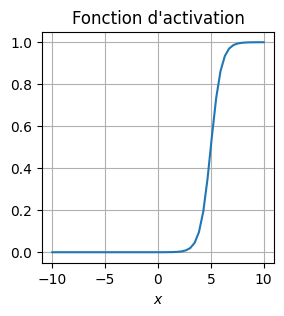

In [2]:
def sigmoid(x):
    a = 2.0   # la pente au niveau du seuil est a/4
    theta = 5.0  # seuil
    return 1/(1+np.exp(-a*(x-theta)))-1/(1+np.exp(a*theta))

x = np.linspace(-10,10)
plt.figure()
plt.plot(x,sigmoid(x))
plt.grid(True)
plt.xlabel('$x$')
plt.title("Fonction d'activation")
plt.show()

Notons que si l'on réécrit l'équation différentielle composante par composante, on trouve que la dynamique de chaque groupe de neurone s'écrit
$$
\tau \dot x_i = -x_i + s_i\left(\sum_{j=1}^n w_{ij}x_j + d_{i}^{\rm ext}\right)
$$

**Question 1** Justifier que si les fonctions d'activation $s_i:\mathbb{R}\to \mathbb{R}$ sont bornées (minorées et majorées) alors toutes les solutions maximales $t\mapsto x(t)$ sont définies sur $\mathbb{R}$ et sont bornées. Relier la borne de $t\mapsto x_i(t)$ à la borne de $s_i$ pour chaque $i$. 


**Réponse Question 1** 
Montrons que toutes les solutions maximales $t\mapsto x(t)$ sont définies et bornées sur $\mathbb{R}^+$

Comme $\tau>0 $, on peut écrire $$
\dot x = f(x)
$$ avec $f$ fonction continue de $\mathbb{R}^n$ dans $\mathbb{R}^n$ $$
f(x)= \frac{1}{\tau} \left(- x + S(Wx + d^{\rm ext})\right)
$$

Soit $M_i$ la borne de $s_i$ pour chaque $i$,c'est-à-dire $|s_i(x)| \leq M_i$ pour tout $x\in\mathbb{R}^+$. Alors $S$ est bornée par $M=M_1+M_2+...+M_n$ Donc $$
\forall x\in\mathbb{R}^n, \|f(x)\|\leq\frac{1}{\|\tau\|}\cdot \|x\| + \frac{1}{\|\tau\|}\cdot M
$$ 
Donc par critère d'existence globale, toutes les solutions maximales $t\mapsto x(t)$ sont définies sur $\mathbb{R}^+$

**Remarque :** dans la démonstration ci-dessus, nous avons travaillé en norme 1. Comme nous sommes en dimension finie, toutes les normes sont équivalentes et donc notre raisonnement s'applique pour toute norme.

Montrons que chaque $x_i$ est borné, ce qui montrera que $x$ est borné. 

Soit $i\in[|1;n|]$, $m$ et $M$ un minorant et un majorant de $s_i$. On introduit la fonction g continue de $\mathbb{R}^+$ dans $\mathbb{R}$ définie par $ g(t)=s_i\left(\sum_{j=1}^n w_{ij}x_j(t) + d_{i}^{\rm ext}\right)$

L'équation différentielle de la composante $x_i$ s'écrit : $\tau \dot x_i + x_i = g(t)$

Solution de l'équation homogène : $x_i(t)=\lambda \exp(-\frac{t}{\tau})$ où $\lambda \in \mathbb{R}$. On applique ensuite la méthode de la variation de la constante pour trouver la solution de l'équation :
$$
x_i(t)=\lambda \exp(-\frac{t}{\tau}) + \exp(-\frac{t}{\tau}) \int_0^t g(u) \frac{\exp(\frac{u}{\tau})}{\tau}du 
$$où   $x_i(0)=\lambda \in \mathbb{R}$
Comme $s_i$ est borné, $g$ l'est aussi et on peut écrire :
$$
\lambda \exp(-\frac{t}{\tau}) + \exp(-\frac{t}{\tau}) m \int_0^t\frac{\exp(\frac{u}{\tau})}{\tau}du \leq x_i(t) \leq \lambda \exp(-\frac{t}{\tau}) + \exp(-\frac{t}{\tau}) M \int_0^t \frac{\exp(\frac{u}{\tau})}{\tau}du 
$$
D'où
$$
(\lambda-m)\exp(-\frac{t}{\tau}) + m \leq x_i(t) \leq (\lambda-M)\exp(-\frac{t}{\tau}) + M
$$
**Remarque** : pour $t \gg \tau$, les bornes de $x_i$ sont celles de $s_i$.

Sur $\mathbb{R}^+$, on peut ensuite encadrer $\exp(-\frac{t}{\tau})$ entre 0 et 1.

Premier cas, $\lambda \leq m$ : Alors $2m-\lambda \leq x_i(t) \leq 2M - \lambda$

Deuxième cas, $m \leq \lambda \leq M$ : Alors $m \leq x_i(t) \leq 2M -\lambda$

Dernier cas, $M \leq \lambda$ : Alors $m \leq x_i(t) \leq \lambda$

Dans tous les cas, $x_i$ est borné sur $\mathbb{R}^+$ donc $x$ est borné.


Pour simplifier, on étudie ce système en dimension 2, c'est-à-dire avec deux groupes de neurones: le premier ayant un effet *excitant* et le deuxième *inhibant*. On traduit cela par la matrice d'interconnection suivante.

In [3]:
W = np.array([[5.0, -4.0], [8.0, -1.0]])
print(W)

[[ 5. -4.]
 [ 8. -1.]]


On fixe aussi $s_1=s_2$ données par la sigmoide ci-dessus, ainsi que $\tau=1$ puisque faire varier $\tau$ ne change que l'échelle de temps. On va essayer d'étudier et exploiter la grande richesse de comportements asymptotiques possibles pour différentes valeurs de $d^{\rm ext}$.

Points d'équilibre
================

On commence par considérer $d^{\rm ext}$ constant. Ses composantes $d_1^{\rm ext}$ et $d_2^{\rm ext}$ peuvent donc être vus comme des paramètres du système. Les points d'équilibre $x^{\rm eq}\in \mathbb{R}^n$ se caractérisent alors par l'équation
$$
x^{\rm eq} = S(W x^{\rm eq} + d^{\rm ext})
$$
La fonction suivante trace les points $(x_1,x_2)$ tels que $-x_1+s(w_{11}x_1+w_{12}x_2+d_1^{\rm ext})=0$ (en rouge) et $-x_2+s(w_{21}x_1+w_{22}x_2+d_2^{\rm ext})=0$ (en vert) pour des valeurs de $d^{\rm ext}$ à choisir.

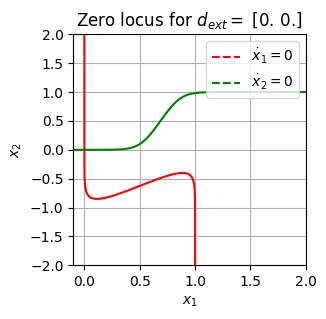

In [4]:
def plot_zero_locus(d_ext):
    grid_x1 = np.linspace(-0.1,2.0,100)
    grid_x2 = np.linspace(-2.0,2.0,100)
    X1, X2 = np.meshgrid(grid_x1,grid_x2)

    X1dot = -X1 + sigmoid(W[0,0]*X1 + W[0,1]*X2 + d_ext[0])
    X2dot = -X2 + sigmoid(W[1,0]*X1 + W[1,1]*X2 + d_ext[1])

    plt.figure()
    C1 = plt.contour(X1, X2, X1dot, 0, colors = 'red')
    C2 = plt.contour(X1, X2, X2dot, 0, colors = 'green')
    h1,_ = C1.legend_elements()
    h2,_ = C2.legend_elements()
    plt.grid(True)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.legend([h1[0],h2[0]],['$\dot x_1 = 0$','$\dot x_2 = 0$'])
    plt.title("Zero locus for $d_{ext} =$ "+ str(d_ext))
    plt.show()
    return


d_ext = np.array([0.0,0.0])  # A CHOISIR
plot_zero_locus(d_ext)

**Question 2** Identifier le point d'équilibre du système pour $d^{\rm ext}=0$ et étudier sa stabilité. 

**Question 3** Tester d'autres valeurs de $d^{\rm ext}$. Par exemple, fixer $d^{\rm ext}_2=4$, et faire varier $d^{\rm ext}_1$ entre 3 et 8. Qu'observe-t-on sur le nombre de points d'équilibre ? Pour $d^{\rm ext}=(6,4)$, on trace ci-dessous le portrait de phase. Retrouver graphiquement les points d'équilibre et intuiter leur stabilité. Quels sont les seuls comportements asymptotiques possibles des solutions pour cette valeur constante de $d^{\rm ext}$ ?

**Réponse question 2** 
On observe une intersection des courbes pour des valeurs qui semblent être proches de $x^{\rm eq}_1=0$ et $x^{\rm eq}_2=0$. Or cette intersection correspond au point d'équilibre du système. On vérifie ensuite par le calcul que le point (0,0) est bien un point d'équilibre, autrement dit s'il satisfait les deux équations suivantes : 
$-x_1+s(w_{11}x_1+w_{12}x_2+d_1^{\rm ext})=0$ et $-x_2+s(w_{21}x_1+w_{22}x_2+d_2^{\rm ext})=0$
C'est bien le cas. Nous avons donc trouvé le point d'équilibre.

Il s'agit maintenant d'étudier sa stabilité. 
Pour cela, on utilise le théorème qui fait le lien entre stabilité et stabilité du linéarisé tangent.
On a :
$$\dot x = f(x)
$$ avec
$$
f(x)=- x + S(Wx + d^{\rm ext})
$$ $f$ est continuement différentiable et présente un point d'équilibre en (0,0).
Sa matrice jacobienne en (0,0) s'écrit : 
\begin{bmatrix}
-1 + \frac{10e^{10}}{(1+ e^{10})^2}  & \frac{-8e^{10}}{(1+ e^{10})^2} \\
\frac{16e^{10}}{(1+ e^{10})^2} & -1 + \frac{-2e^{10}}{(1+ e^{10})^2}
\end{bmatrix}

Sa trace étant négative et son déterminant positif, on en déduit que les parties réelles de ses valeurs propres sont négatives. On peut s'en assurer à l'aide de la fonction suivante : 

In [5]:
def jacobienne (x1,x2):
    jac = np.array([[-1+(10*np.exp(-2*(5*x1-4*x2-5)))/((1+np.exp(-2*(5*x1-4*x2-5)))**2), (-8*np.exp(-2*(5*x1-4*x2-5)))/((1+np.exp(-2*(5*x1-4*x2-5)))**2)],
                    [(16*np.exp(-2*(8*x1-x2-5)))/((1+np.exp(-2*(8*x1-x2-5)))**2),-1+(-2*np.exp(-2*(8*x1-x2-5)))/((1+np.exp(-2*(8*x1-x2-5)))**2)]])
    return(np.linalg.eigvals(jac))
jacobienne (0,0)

array([-0.99981842+0.00043542j, -0.99981842-0.00043542j])

On en déduit que (0,0) est localement asymptotiquement stable. En observant le portrait de phase, on peut également supposer que ce point est globalement asymptotiquement stable.

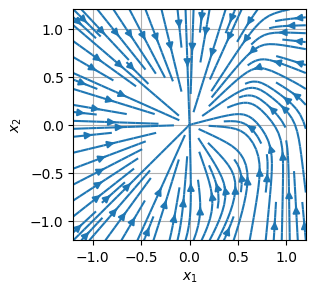

In [6]:
d_ext = np.array([0.0,0.0])  

grid_x1 = np.linspace(-1.2,1.2,70)
grid_x2 = np.linspace(-1.2,1.2,70)
X1, X2 = np.meshgrid(grid_x1,grid_x2)

X1dot = -X1 + sigmoid(W[0,0]*X1 + W[0,1]*X2 + d_ext[0])
X2dot = -X2 + sigmoid(W[1,0]*X1 + W[1,1]*X2 + d_ext[1])

plt.figure()
plt.streamplot(grid_x1, grid_x2, X1dot, X2dot)
plt.grid(True)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

**Réponse question 3** 
On commence par fixer $d^{\rm ext}_2=4$, et faire varier $d^{\rm ext}_1$ entre 3 et 5. On observe toujours un seul point d'équilibre.

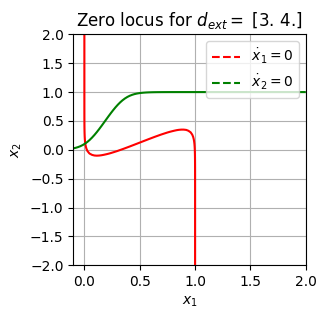

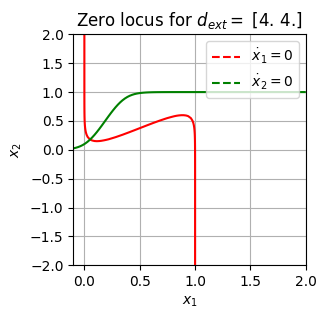

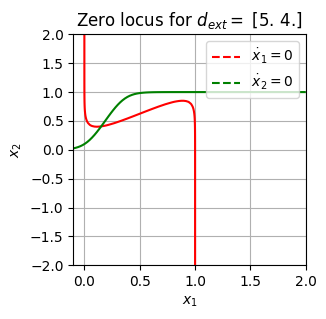

In [7]:
d_ext = np.array([3.0,4.0]) 
plot_zero_locus(d_ext)

d_ext = np.array([4.0,4.0]) 
plot_zero_locus(d_ext)

d_ext = np.array([5.0,4.0]) 
plot_zero_locus(d_ext)

Mais lorsqu'on continue d'augmenter $d^{\rm ext}_1$, plusieurs points d'équilibres apparaissent.

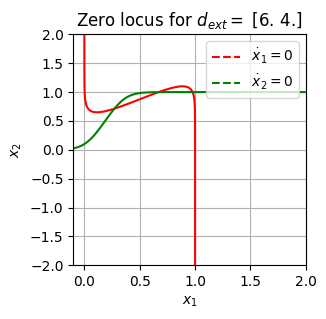

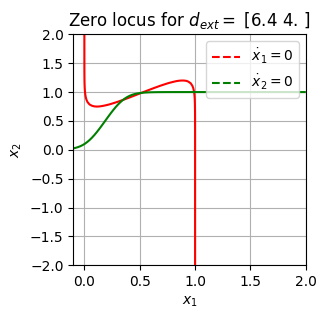

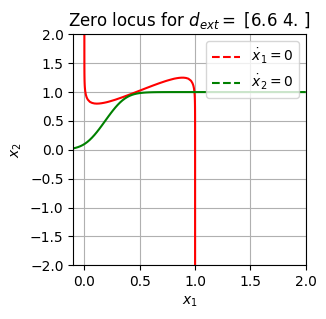

In [8]:
d_ext = np.array([6.0,4.0]) 
plot_zero_locus(d_ext)

d_ext = np.array([6.4,4.0]) 
plot_zero_locus(d_ext)

d_ext = np.array([6.6,4.0])  
plot_zero_locus(d_ext)

Puis, en augmentant à nouveau, il ne reste plus qu'un seul point d'équilibre.

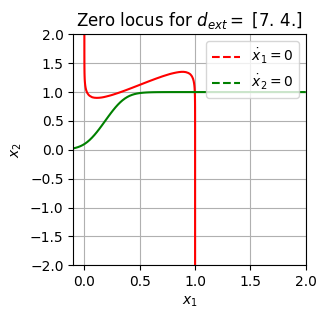

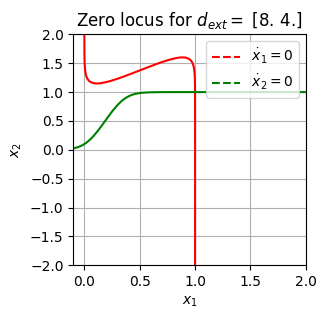

In [9]:
d_ext = np.array([7.0,4.0])
plot_zero_locus(d_ext)
d_ext = np.array([8.0,4.0]) 
plot_zero_locus(d_ext)

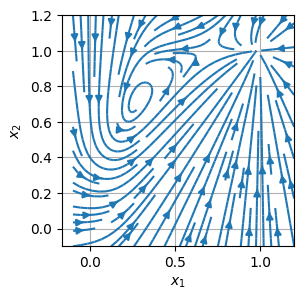

In [10]:
d_ext = np.array([6.0,4.0])  

grid_x1 = np.linspace(-0.1,1.2,70)
grid_x2 = np.linspace(-0.1,1.2,70)
X1, X2 = np.meshgrid(grid_x1,grid_x2)

X1dot = -X1 + sigmoid(W[0,0]*X1 + W[0,1]*X2 + d_ext[0])
X2dot = -X2 + sigmoid(W[1,0]*X1 + W[1,1]*X2 + d_ext[1])

plt.figure()
plt.streamplot(grid_x1, grid_x2, X1dot, X2dot)
plt.grid(True)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

A partir de ce portrait de phase on peut conjecturer l'existence de trois points d'équilibres : (1.0;1.0),(0.3;0.7), (0.7;1.0). 
On peut intuiter que les points (1.0;1.0) et (0.3;0.7) sont des points d'équilibre localement asymptotiquement stable car les lignes du portrait de phase semblent converger vers ces points. En revanche, le point (0.7;1.0) paraît être un point d'équilibre instable car les lignes du portrait de phase semblent fuir ce point. Les seuls comportements asymptotiques possibles pour cette valeur de $d^{\rm ext}_2$ sont des comportements locaux car il y a plusieurs points d'équilibre.

Lorsque le nombre et la nature (stabilité) des points d'équilibre changent brusquement avec des modifications de paramètres, on parle de *bifurcation*. De tels phénomènes permettent généralement de produire des comportements asymptotiques extrêmement riches et variés, simplement en faisant varier ces paramètres. Nous en étudions plusieurs exemples dans la suite.

Simulation des trajectoires
================

**Question 4** Compléter la fonction ``solve_euler_explicit`` ci-dessous prenant en entrée une fonction $f: \mathbb{R}\times\mathbb{R}^n \to \mathbb{R}^n$ quelconque, une condition initiale $x_0$, un pas de temps $dt$, les temps initiaux et finaux, et renvoyant e vecteur des temps $t^j$ et de la solution $x^j$ du schéma d'Euler explicite appliqué à $\dot{x}=f(t,x)$.

In [11]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    n = len(x0)
    m = int((tf-t0)//dt)
    t = np.zeros(m)
    x = np.zeros((m,n))
    t[0] = t0
    x[0] = x0
    for i in range (m-1):
        t[i+1] = t[i] + dt
        x[i+1] = x[i] + dt*f(t[i],x[i])
    return(t,x)

**Question 5** Expliquer (sans le faire) comment on pourrait trouver numériquement l'ordre de convergence de ce schéma.


**Réponse question 5** 
Méthode 1 :
Si on admet l'approximation que l'erreur numérique est reliée à l'ordre de convergence par cette relation :
$$\text{Erreur}(\Delta t) \approx C \cdot (\Delta t)^p$$
où C est une constante et $\Delta t$ le pas de temps choisi pour le schéma.
On pourrait procéder ainsi pour déterminer numériquement l'ordre de convergence de ce schéma :

On commence par fixer un pas de temps $\Delta t^0$. On utilise ensuite notre algorithme solver_euler_explicit sur la même fonction f, avec les mêmes valeurs de $x_0$, $t_0$, $t_f$ mais en faisant diminuer successivement les valeurs de $\Delta t$. On pourra par exemple prendre les valeurs $\Delta t^0$, $\frac{\Delta t^0}{2}$, $\frac{\Delta t^0}{4}$...
On calculera ensuite la norme de la différence entre chaque résultat successif. D'après la relation précédente on a : 
$$\log(\text{Erreur}(\Delta t)) \approx \log(C) + p \cdot \log(\Delta t)$$
On pourra donc tracer la courbe du logarithme de la différence en fonction du logarithme du pas de temps.
On calculera ensuite la pente de la courbe avec une régression linéaire et on en déduira ainsi l'ordre de convergence.

Méthode 2 : 
On commence par calculer l'ordre de consistance du schéma en utilisant la condtion nécessaire et suffisante de consistance. Avec une boucle while on repèrera à partir de quelle valeur de k la formule
$$
\frac{\partial^k\Phi}{\partial \Delta t^k}(t,x,0)=\frac{1}{k+1} f^{[k]}(t,x)
$$n'est plus vérifiée : on saura alors que c'est l'ordre de consistance du schéma.
On trouve ainsi que le schéma d'Euler explicite est consitant d'ordre exactement 1.
On pourra ensuite utiliser la condition suffisante de convergence, si on montre que la fonction $\Phi$ est localement lipschitzienne, pour montrer que c'est également son ordre de convergence.

**Question 6** On utilise maintenant ``solve_euler_explicit`` pour simuler des trajectoires de neurones lorsque $d^{\rm ext}$ est constant. En vous aidant du portrait de phase de la question 3, illustrer les comportements asymptotiques possibles des solutions pour $d^{\rm ext}=(6,4)$, en choisissant différentes conditions initiales. Lequel ne peut-on pas illustrer numériquement ?

**Réponse question 6**
Parmi les 3 points d'équilibres trouvés à la question 3, on ne pourra pas illustrer numériquement le point d'équilibre instable. Néanmoins, il est possible de le faire pour les points d'équilibre stable si on choisit une condition initiale suffisamment proche de ces points. Par exemple pour le point situé approximativement en (1.0;1.0), on pourra donner la condition initiale (0.95;0.95) et obtenir le résultat suivant :  

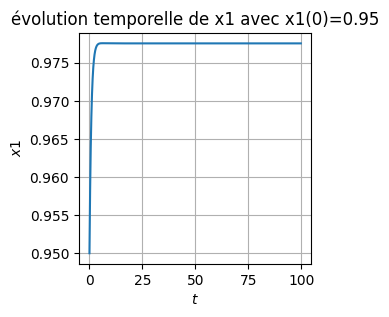

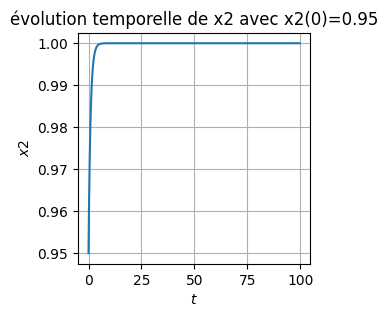

Le point d'équilibre est situé en ( 0.9775529186529996 ; 0.9999458039355726 )


In [12]:
def f_d_ext_constant(t,x):
    d_ext = np.array([6.0,4.0])
    return -x + sigmoid(np.dot(W,x)+d_ext)

x0 = (0.95,0.95)
dt = 0.1
t0, tf = 0.0, 100.0
time, x = solve_euler_explicit(f_d_ext_constant, x0, dt, t0, tf)
x1=np.array([x[i][0] for i in range(len(x))])
x2=np.array([x[i][1] for i in range(len(x))])

plt.figure()
plt.plot(time,x1)
plt.grid(True)
plt.xlabel('$t$')
plt.ylabel('$x1$')
plt.title("évolution temporelle de x1 avec x1(0)=0.95")
plt.show()

plt.figure()
plt.plot(time,x2)
plt.grid(True)
plt.xlabel('$t$')
plt.ylabel('$x2$')
plt.title("évolution temporelle de x2 avec x2(0)=0.95")
plt.show()

print ("Le point d'équilibre est situé en (",x[len(x)-1][0],";",x[len(x)-1][1],")")

Ici on stabilise bien vers le point d'équilibre annoncé.
On souhaite maintenant retrouver le point d'équilibre stable situé en (0.3;0.7). Pour cela on impose la condition initiale (0.3;0.7) et on obtient :

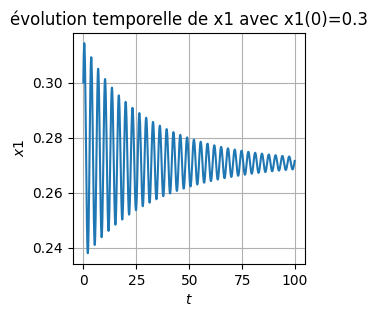

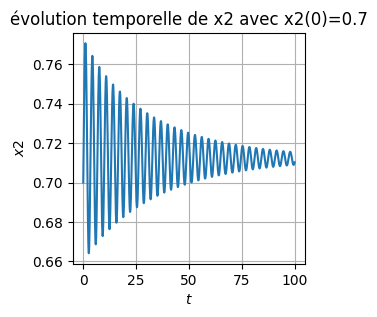

Le point d'équilibre est situé en ( 0.27148282357916076 0.7102762455435099 )


In [13]:
x0 = (0.3,0.7)
dt = 0.1
t0, tf = 0.0, 100.0
time, x = solve_euler_explicit(f_d_ext_constant, x0, dt, t0, tf)
x1=np.array([x[i][0] for i in range(len(x))])
x2=np.array([x[i][1] for i in range(len(x))])

plt.figure()
plt.plot(time,x1)
plt.grid(True)
plt.xlabel('$t$')
plt.ylabel('$x1$')
plt.title("évolution temporelle de x1 avec x1(0)=0.3")
plt.show()

plt.figure()
plt.plot(time,x2)
plt.grid(True)
plt.xlabel('$t$')
plt.ylabel('$x2$')
plt.title("évolution temporelle de x2 avec x2(0)=0.7")
plt.show()

print ("Le point d'équilibre est situé en (",x[len(x)-1][0],x[len(x)-1][1],")")

Et sur une échelle de temps un peu plus longue :

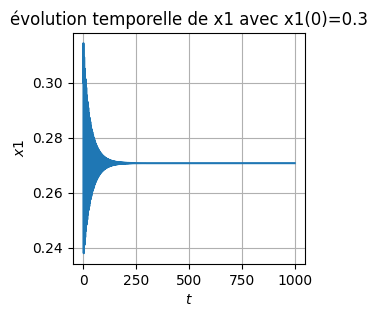

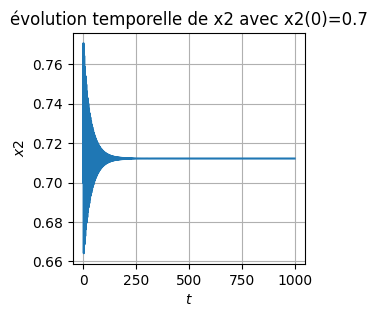

Le point d'équilibre est situé en ( 0.27067655003585755 0.712216037968717 )


In [14]:
x0 = (0.3,0.7)
dt = 0.1
t0, tf = 0.0, 1000.0
time, x = solve_euler_explicit(f_d_ext_constant, x0, dt, t0, tf)
x1=np.array([x[i][0] for i in range(len(x))])
x2=np.array([x[i][1] for i in range(len(x))])

plt.figure()
plt.plot(time,x1)
plt.grid(True)
plt.xlabel('$t$')
plt.ylabel('$x1$')
plt.title("évolution temporelle de x1 avec x1(0)=0.3")
plt.show()

plt.figure()
plt.plot(time,x2)
plt.grid(True)
plt.xlabel('$t$')
plt.ylabel('$x2$')
plt.title("évolution temporelle de x2 avec x2(0)=0.7")
plt.show()

print ("Le point d'équilibre est situé en (",x[len(x)-1][0],x[len(x)-1][1],")")

De la même manière qu'avec le premier point, on se stabilise bien au niveau du point d'équilibre souhaité. Il peut être intéressant de remarquer que les régimes pris par le système avant de se stabiliser ont varié entre les deux points : dans le premier cas le régime semblait apériodique alors qu'il parait ici être pseudo-périodique.

**Question 7** On fixe maintenant $d_2^{\rm ext}=8$ et on fait varier $d_1^{\rm ext}$ lentement de 4 à 8, puis de 8 à 4. En utilisant ``plot_zero_locus``, justifier le comportement de la solution obtenue. Tracer la solution en fonction de $d_1^{\rm ext}$, comment appelle-t-on ce phénomène ? Justifier que l'on parle de *mémoire courte*.

**Réponse question 7**
On choisit pour cette question un $d^{\rm ext}$ non constant.

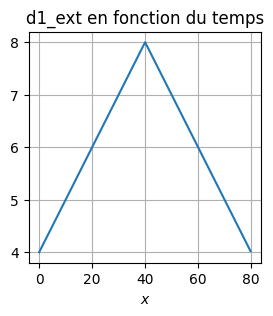

In [15]:
def d_ext_varying(t):
    d1_ext = (0.1*t+4)*(t<40)+(8-0.1*(t-40))*(t>=40)
    d2_ext = 8.0*np.ones(np.shape(t))
    return np.array([d1_ext,d2_ext])

def f_d_ext_varying(t,x):
    return -x + sigmoid(np.dot(W,x)+d_ext_varying(t))

x0 = np.array([0.0,1.0])
dt = 0.1
t0, tf = 0.0, 80.0
time, x = solve_euler_explicit(f_d_ext_varying, x0, dt, t0, tf)

d1=[d_ext_varying(t)[0] for t in time] 
plt.figure() 
plt.plot(time,d1) 
plt.grid(True) 
plt.xlabel('$x$') 
plt.title("d1_ext en fonction du temps") 
plt.show()

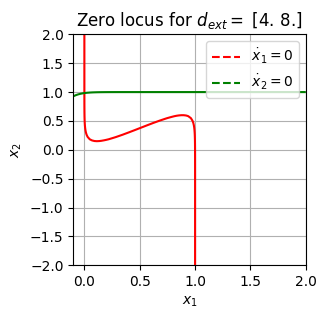

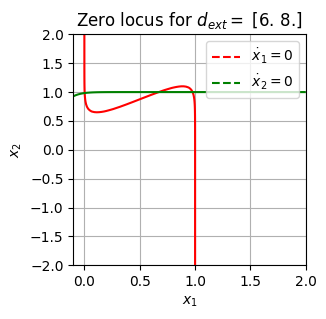

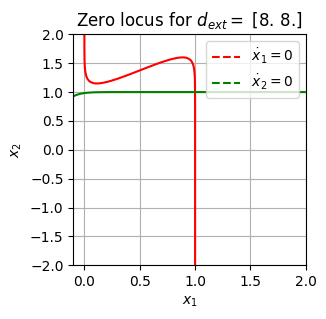

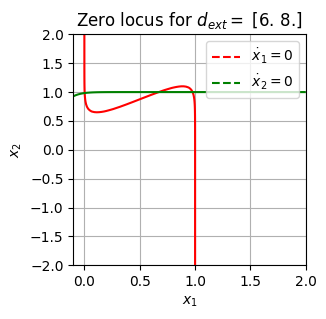

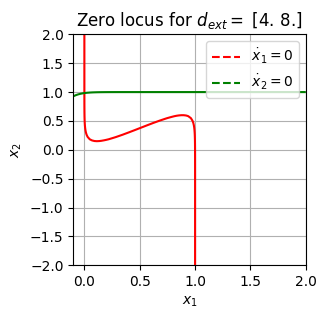

In [16]:
plot_zero_locus(d_ext_varying(0))
plot_zero_locus(d_ext_varying(20))
plot_zero_locus(d_ext_varying(40))
plot_zero_locus(d_ext_varying(60))
plot_zero_locus(d_ext_varying(80))

D'après ces différents graphiques on peut intuiter que la solution commencera par avoir un point d'équilibre en (0.0;1.0), puis trois, avant de retourner à un seul point d'équilibre, cette fois-ci en (1.0;1.0). A partir de t=40, le même cycle se reproduira à l'envers, passant par trois points d'équilibre et finissant par un unique point d'équilibre en (0.0;1.0).
On trace donc la solution en fonction de $d_1^{\rm ext}$:

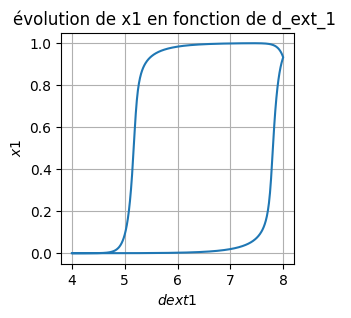

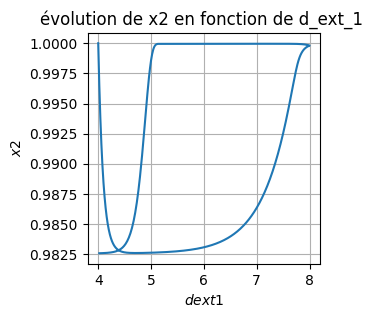

In [17]:
x1=np.array([x[i][0] for i in range(len(x))])
x2=np.array([x[i][1] for i in range(len(x))])

d_ext1=[d_ext_varying(t)[0] for t in time]

plt.figure()
plt.plot(d_ext1,x1)
plt.grid(True)
plt.xlabel('$dext1$')
plt.ylabel('$x1$')
plt.title("évolution de x1 en fonction de d_ext_1 ")
plt.show()

plt.figure()
plt.plot(d_ext1,x2)
plt.grid(True)
plt.xlabel('$dext1$')
plt.ylabel('$x2$')
plt.title("évolution de x2 en fonction de d_ext_1 ")
plt.show()

On observe que l'évolution de $x_1$ et $x_2$ ne suit pas le même chemin selon si $d_1^{\rm ext}$ augmente ou diminue : c'est un phénomène d'hystérésis. 

Si on décide maintenant d'afficher la solution en fonction du temps et qu'on compare à la solution lorsque $d^{\rm ext}$ est constant, on obtient :

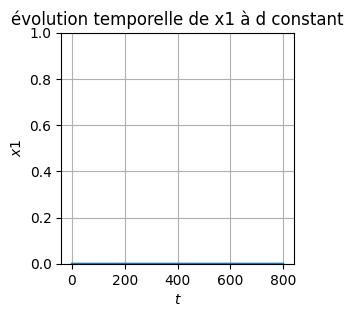

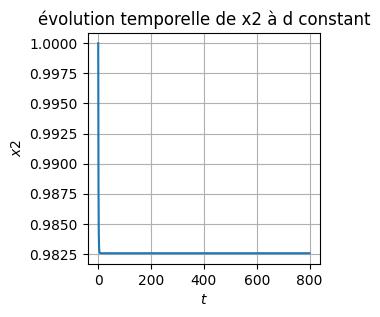

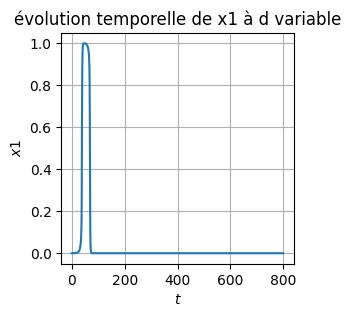

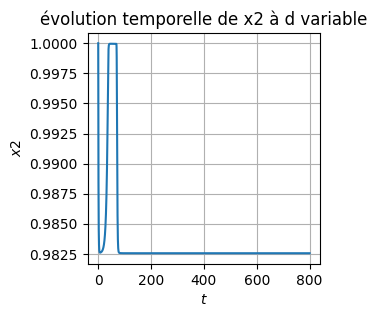

In [18]:
def f_d_ext_constant(t,x):
    d_ext = np.array([4.0,8.0])
    return -x + sigmoid(np.dot(W,x)+d_ext)

x0 = np.array([0.0,1.0])
dt = 0.1
t0, tf = 0.0, 800.0
time, x = solve_euler_explicit(f_d_ext_constant, x0, dt, t0, tf)
x1=np.array([x[i][0] for i in range(len(x))])
x2=np.array([x[i][1] for i in range(len(x))])

plt.figure()
plt.plot(time,x1)
plt.grid(True)
plt.xlabel('$t$')
plt.ylabel('$x1$')
plt.title("évolution temporelle de x1 à d constant")
plt.ylim(0,1) #tu avais mis xlim et pas ylim
plt.show()

plt.figure()
plt.plot(time,x2)
plt.grid(True)
plt.xlabel('$t$')
plt.ylabel('$x2$')
plt.title("évolution temporelle de x2 à d constant")
plt.show()


time_, x_ = solve_euler_explicit(f_d_ext_varying, x0, dt, t0, tf)
x1_=np.array([x_[i][0] for i in range(len(x_))])
x2_=np.array([x_[i][1] for i in range(len(x_))])

plt.figure()
plt.plot(time_,x1_)
plt.grid(True)
plt.xlabel('$t$')
plt.ylabel('$x1$')
plt.title("évolution temporelle de x1 à d variable")
plt.show()

plt.figure()
plt.plot(time_,x2_)
plt.grid(True)
plt.xlabel('$t$')
plt.ylabel('$x2$')
plt.title("évolution temporelle de x2 à d variable")
plt.show()

On peut parler de mémoire courte en observant les graphiques en fonction du temps : on remarque que les trajectoires sont relativement similaires à celles pour un $d_1^{\rm ext}$ constant. 
En effet, dans le cadre de la résolution d'équations différentielles, on parle de "mémoire courte" pour désigner le fait que la solution dépend des conditions initiales et de l'équation mais pas de l'ensemble des valeurs prises par un paramètre (ici $d_1^{\rm ext}$), seulement de la valeur du paramètre et sa manière d'évoluer à partir de cette valeur.

Bendixon et cycle limite
============================

On cherche maintenant à faire apparaître un cycle limite oscillatoire. On s'appuie pour cela sur le théorème de *Bendixon* qui décrit le comportement possible de solutions bornées d'équations différentielles en dimension 2:

    ''Pour une équation différentielle de dimension 2 définie par une fonction continument différentiable, toute solution maximale bornée converge soit vers un point soit vers une fonction périodique du temps appelée *cycle limite*''
    
**Question 8** Justifier que l'on recherche alors une valeur de $d_{\rm ext}$ pour laquelle le système admet un seul point d'équilibre et pour laquelle ce point est instable. 

**Question 9** La fonction ci-dessous permet de tracer les zéros de la dynamique comme ci-dessus mais superposés aux zones où la trace de la jacobienne de $f$ est strictement négative et son déterminant strictement positif. Compléter le calcul de la jacobienne et proposer une méthode empirique pour trouver une valeur de $d_{\rm ext}$ donnant un cycle limite. Vérifier en simulation l'apparition de ce cycle limite.

**Réponse question 8** 
Si le sytème admet un point d'équilibre stable, alors toute solution maximale avec une initialisation suffisamment proche de ce point finira par converger vers ce point d'équilibre et n'aura donc pas le comportement oscillant souhaité. Il ne faut donc aucun point d'équilibre stable. A l'inverse, en présence d' un point d'équilibre instable, un cycle limite pourra se former. 
Or, la présence d'un unique point d'équilibre instable facilitera la formation du cylcle limite. Si la région considérée contient en effet plusieurs points d'équilibre instables les trajectoires du système s'éloignent de tous les points d'équilibre instables, ce qui complique la formation d'un cycle limite.
On recherche donc une valeur de $d^{\rm ext}$ pour laquelle le système admet un seul point d'équilibre et pour laquelle ce point est instable. 

**Réponse question 9** 
D'après la question précédente, pour obtenir un cycle limite on cherche une valeur de $d_{\rm ext}$ pour laquelle le système admet un seul point d'équilibre instable. Lorsque la trace de la jacobienne appliquée au point d'équilibre est strictement négative et le déterminant strictement positf, le point d'équilibre est stable.

Grâce à la fonction qui trace les zéros de la dynamique superposés aux zones où la trace de la jacobienne de $f$ est strictement négative et son déterminant strictement positif, il est possible de visualiser rapidement le nombre et la nature des points d'équilibre. En effet, lorsqu'un point d'équilibre apparaît dans une zone jaune, puisque la trace de la jacobienne de $f$ est strictement négative et son déterminant strictement positif, on sait que le point d'équilibre est stable.
Afin d'observer un cycle limite il est donc nécessaire de faire varier $d_{\rm ext}$ jusqu'à obtenir la configuration souhaitée, c'est-à-dire un unique point d'équilibre, de nature instable. 
Empiriquement, on trouve que ces conditions sont vérifiées pour $d_1^{\rm ext}=4$ et $d_2^{\rm ext}=1$. 

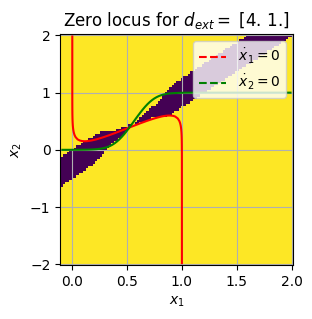

In [19]:
def jacobian_dynamics(x1,x2,d_ext):
    d_ext1,d_ext2 = d_ext
    jac = np.array([[-1+(10*np.exp(-2*(5*x1-4*x2-5+d_ext1)))/((1+np.exp(-2*(5*x1-4*x2-5+d_ext1)))**2), (-8*np.exp(-2*(5*x1-4*x2+d_ext1-5)))/((1+np.exp(-2*(5*x1-4*x2+d_ext1-5)))**2)],
                    [(16*np.exp(-2*(8*x1-x2+d_ext2-5)))/((1+np.exp(-2*(8*x1-x2+d_ext2-5)))**2),-1+(-2*np.exp(-2*(8*x1-x2+d_ext2-5)))/((1+np.exp(-2*(8*x1-x2+d_ext2-5)))**2)]])
    return jac

def plot_zero_locus_stabilite(d_ext):
    N = 100
    grid_x1 = np.linspace(-0.1,2.0,N)
    grid_x2 = np.linspace(-2.0,2.0,N)
    X1, X2 = np.meshgrid(grid_x1,grid_x2)

    X1dot = -X1 + sigmoid(W[0,0]*X1 + W[0,1]*X2 + d_ext[0])
    X2dot = -X2 + sigmoid(W[1,0]*X1 + W[1,1]*X2 + d_ext[1])

    # compute trace and determinant of jacobian matrix on the grid
    tr = np.zeros((N,N))
    deter = np.zeros((N,N))
    for i in np.arange(N):
        for j in np.arange(N):
            tr[i,j] = np.trace(jacobian_dynamics(X1[i,j],X2[i,j],d_ext))
            deter[i,j] = np.linalg.det(jacobian_dynamics(X1[i,j],X2[i,j],d_ext))

    # plot zone where  the trace of the jacobian is negative and its determinant positive
    plt.figure()
    plt.pcolormesh(X1,X2,(tr<0)*(deter>0))

    # root locus plot
    C1 = plt.contour(X1, X2, X1dot, 0, colors = 'red')
    C2 = plt.contour(X1, X2, X2dot, 0, colors = 'green')
    h1,_ = C1.legend_elements()
    h2,_ = C2.legend_elements()
    plt.grid(True)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.legend([h1[0],h2[0]],['$\dot x_1 = 0$','$\dot x_2 = 0$'])
    plt.title("Zero locus for $d_{ext} =$ "+ str(d_ext))
    plt.show()

    return

plot_zero_locus_stabilite(np.array([4.0,1.0]))

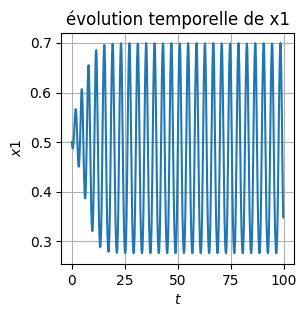

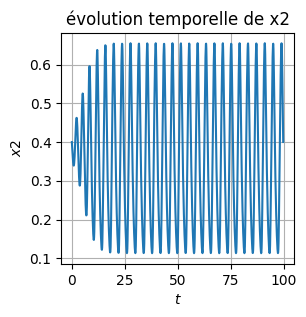

In [20]:
def f_d_ext_constant(t,x):
    d_ext = np.array([4.0,1.0])
    return -x + sigmoid(np.dot(W,x)+d_ext)

x0 = (0.5,0.4)
dt = 0.1
t0, tf = 0.0, 100.0
time, x = solve_euler_explicit(f_d_ext_constant, x0, dt, t0, tf)
x1=np.array([x[i][0] for i in range(len(x))])
x2=np.array([x[i][1] for i in range(len(x))])

plt.figure()
plt.plot(time,x1)
plt.grid(True)
plt.xlabel('$t$')
plt.ylabel('$x1$')
plt.title("évolution temporelle de x1")
plt.show()

plt.figure()
plt.plot(time,x2)
plt.grid(True)
plt.xlabel('$t$')
plt.ylabel('$x2$')
plt.title("évolution temporelle de x2")
plt.show()

On obtient bien une fonction périodique : c'est l'apparition du cycle limite.

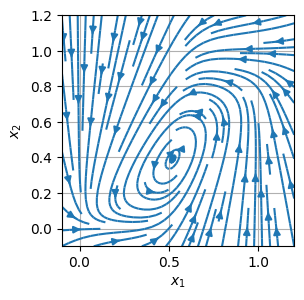

In [30]:
d_ext = np.array([4.0,1.0])   
grid_x1 = np.linspace(-0.1,1.2,70) 
grid_x2 = np.linspace(-0.1,1.2,70) 
X1, X2 = np.meshgrid(grid_x1,grid_x2) 

X1dot = -X1 + sigmoid(W[0,0]*X1 + W[0,1]*X2 + d_ext[0]) 
X2dot = -X2 + sigmoid(W[1,0]*X1 + W[1,1]*X2 + d_ext[1]) 

plt.figure() 
plt.streamplot(grid_x1, grid_x2, X1dot, X2dot) 
plt.grid(True) 
plt.xlabel('$x_1$') 
plt.ylabel('$x_2$') 
plt.show()

On observe que les lignes du portrait de phase tournent autour du point d'équilibre sans pour autant converger, ce qui se retrouve dans le cycle oscillatoire limite que l'on observe.